In [104]:
import pandas as pd
import ta
import matplotlib.pyplot as plt
import numpy as np
import pyti

from pyti.simple_moving_average import simple_moving_average as sma
from pyti.relative_strength_index import relative_strength_index as rsi
from pyti.bollinger_bands import upper_bollinger_band, lower_bollinger_band
from pyti.exponential_moving_average import exponential_moving_average as ema

In [105]:
Apple= pd.read_csv('AAPL_historical_data.csv')

In [106]:
Apple

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0
10995,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0


In [107]:
Apple.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

In [108]:
Apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [109]:
#Convert the 'Date' column to datetime format
Apple['Date'] = pd.to_datetime(Apple['Date'])

# Display the DataFrame to verify the change
print(Apple.head())

        Date      Open      High       Low     Close  Adj Close     Volume  \
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [110]:
Apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [111]:
Apple['SMA_20'] = ta.trend.sma_indicator(Apple['Close'], window=20)
Apple['EMA_20'] = ta.trend.ema_indicator(Apple['Close'], window=20)
Apple['RSI_14'] = ta.momentum.rsi(Apple['Close'], window=14)

# Bollinger Bands with a 20-day window
bbands = ta.volatility.BollingerBands(close=Apple['Close'], window=20, window_dev=2)
Apple['BB_High'] = bbands.bollinger_hband()
Apple['BB_Low'] = bbands.bollinger_lband()

 #Moving Average Convergence Divergence (MACD)
Apple['MACD'] = ta.trend.macd(Apple['Close'])
Apple['MACD_Signal'] = ta.trend.macd_signal(Apple['Close'])

# Calculate daily returns using the ta library
Apple['Daily Return'] = Apple['Close'].pct_change()

# Display the DataFrame with the calculated indicators
#print(df_5_years[['Date', 'Close', 'SMA_20', 'EMA_20', 'RSI_14', 'BB_High', 'BB_Low', 'MACD', 'MACD_Signal']].tail())

In [112]:
Apple.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits', 'SMA_20', 'EMA_20', 'RSI_14', 'BB_High',
       'BB_Low', 'MACD', 'MACD_Signal', 'Daily Return'],
      dtype='object')

In [113]:
recentA= Apple[Apple['Date'] >= '2022-01-01']

In [114]:
recentA.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,EMA_20,RSI_14,BB_High,BB_Low,MACD,MACD_Signal,Daily Return
10352,2022-01-03,177.830002,182.880005,177.710007,182.009995,179.273621,104487900,0.0,0.0,175.4900,174.301988,66.600031,183.626607,167.353393,4.818780,4.982143,0.025004
10353,2022-01-04,182.630005,182.940002,179.119995,179.699997,176.998322,99310400,0.0,0.0,176.2090,174.816084,61.901244,183.064333,169.353666,4.672654,4.920245,-0.012692
10354,2022-01-05,179.610001,180.169998,174.639999,174.919998,172.290207,94537600,0.0,0.0,176.3960,174.825981,53.491262,182.886751,169.905249,4.123607,4.760917,-0.026600
10355,2022-01-06,172.699997,175.300003,171.639999,172.000000,169.414108,96904000,0.0,0.0,176.2420,174.556840,49.102530,182.991338,169.492661,3.413516,4.491437,-0.016693
10356,2022-01-07,172.889999,174.139999,171.029999,172.169998,169.581558,86709100,0.0,0.0,176.1225,174.329521,49.363007,183.068496,169.176504,2.831837,4.159517,0.000988


In [115]:
recentA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 646 entries, 10352 to 10997
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          646 non-null    datetime64[ns]
 1   Open          646 non-null    float64       
 2   High          646 non-null    float64       
 3   Low           646 non-null    float64       
 4   Close         646 non-null    float64       
 5   Adj Close     646 non-null    float64       
 6   Volume        646 non-null    int64         
 7   Dividends     646 non-null    float64       
 8   Stock Splits  646 non-null    float64       
 9   SMA_20        646 non-null    float64       
 10  EMA_20        646 non-null    float64       
 11  RSI_14        646 non-null    float64       
 12  BB_High       646 non-null    float64       
 13  BB_Low        646 non-null    float64       
 14  MACD          646 non-null    float64       
 15  MACD_Signal   646 non-null    float64  

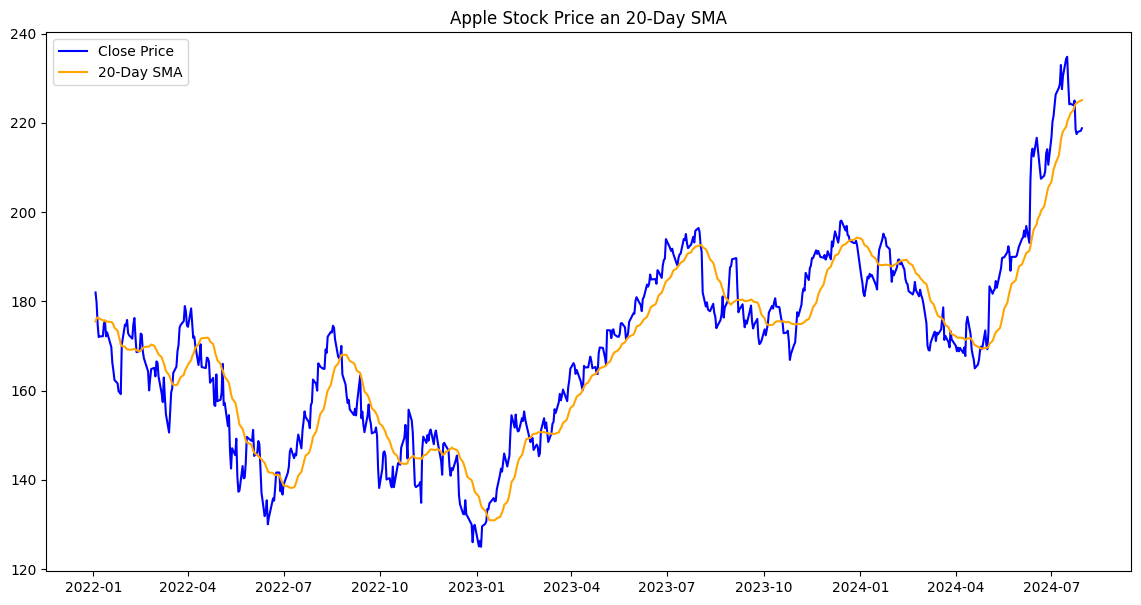

In [116]:
plt.figure(figsize=(14, 7))

# Plot Close Price and SMA
#plt.subplot(3, 1, 1)
plt.plot(recentA['Date'], recentA['Close'], label='Close Price', color='blue')
plt.plot(recentA['Date'], recentA['SMA_20'], label='20-Day SMA', color='orange')
plt.title('Apple Stock Price an 20-Day SMA')
plt.legend()


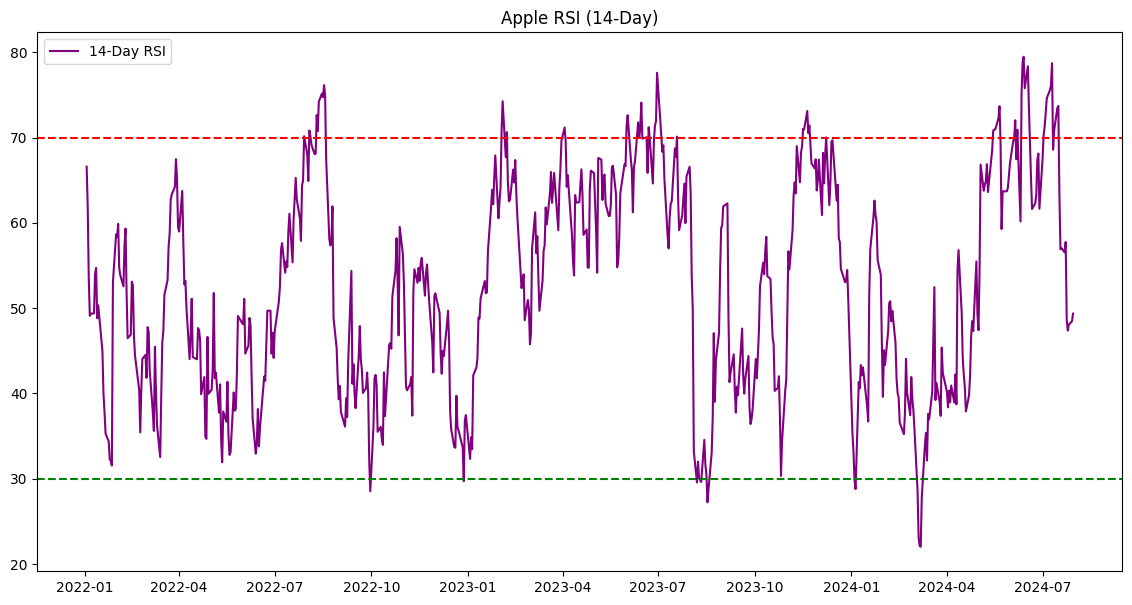

In [117]:
plt.figure(figsize=(14, 7))

# Plot RSI
#plt.subplot(3, 1, 2)
plt.plot(recentA['Date'], recentA['RSI_14'], label='14-Day RSI', color='purple')
plt.title('Apple RSI (14-Day)')
plt.axhline(70, color='red', linestyle='--')  # Overbought line
plt.axhline(30, color='green', linestyle='--')  # Oversold line
plt.legend()

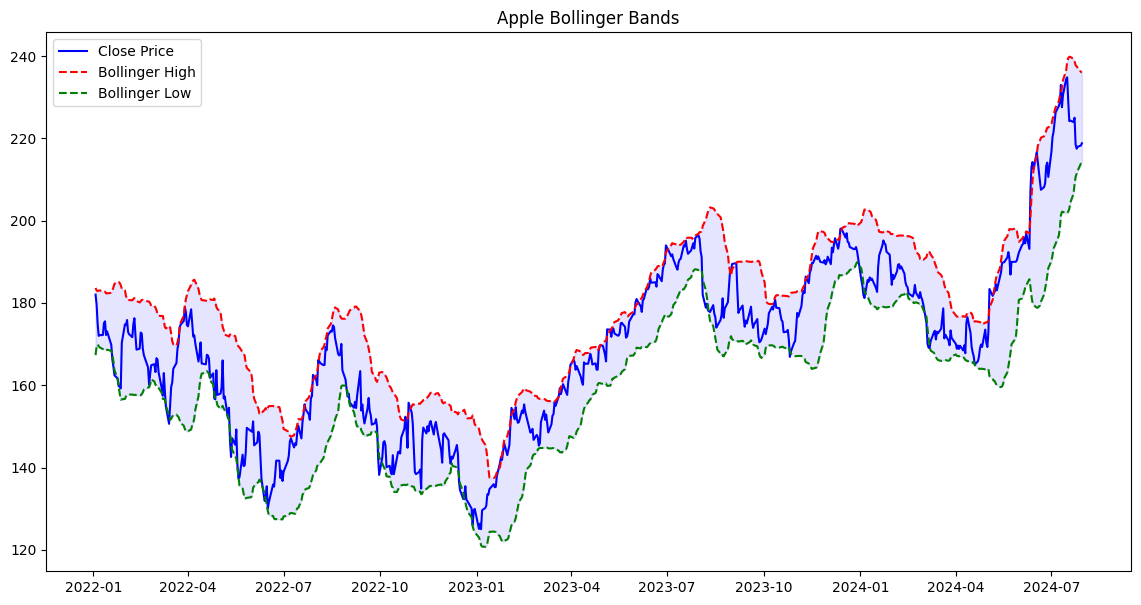

In [118]:
plt.figure(figsize=(14, 7))
plt.plot(recentA['Date'], recentA['Close'], label='Close Price', color='blue')
plt.plot(recentA['Date'], recentA['BB_High'], label='Bollinger High', linestyle='--', color='red')
plt.plot(recentA['Date'], recentA['BB_Low'], label='Bollinger Low', linestyle='--', color='green')
plt.fill_between(recentA['Date'], recentA['BB_Low'], recentA['BB_High'], color='blue', alpha=0.1)
plt.title('Apple Bollinger Bands')
plt.legend()

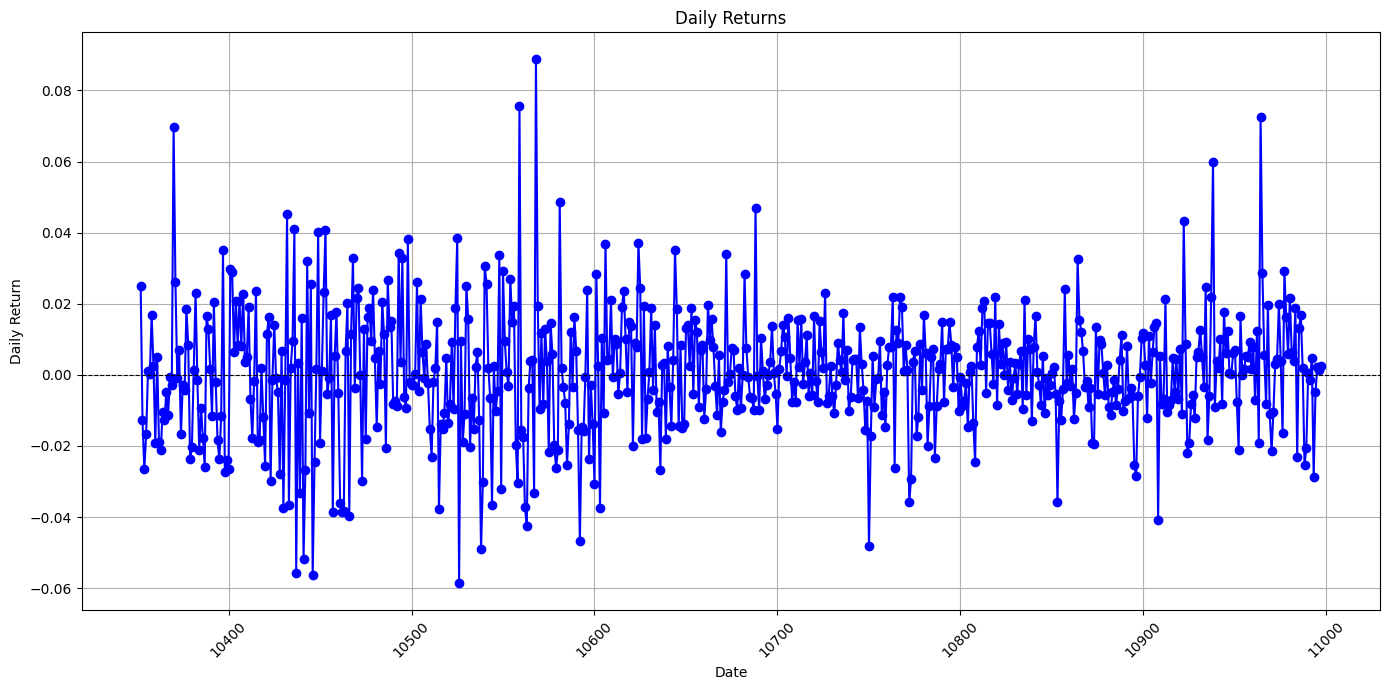

In [119]:
plt.figure(figsize=(14, 7))
plt.plot(recentA['Daily Return'], marker='o', linestyle='-', color='b')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

## Microsoft Google Technical indicators

In [120]:
Msft= pd.read_csv('MSFT_historical_data.csv')

In [121]:
Msft['Date'] = pd.to_datetime(Msft['Date'])

In [122]:
Msft.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0


In [123]:
# Simple Moving Average (SMA) with a 20-day window
Msft['SMA_20'] = ta.trend.sma_indicator(Msft['Close'], window=20)

# Exponential Moving Average (EMA) with a 20-day window
Msft['EMA_20'] = ta.trend.ema_indicator(Msft['Close'], window=20)

# Relative Strength Index (RSI) with a 14-day window
Msft['RSI_14'] = ta.momentum.rsi(Msft['Close'], window=14)

# Bollinger Bands with a 20-day window
bbands = ta.volatility.BollingerBands(close=Msft['Close'], window=20, window_dev=2)
Msft['BB_High'] = bbands.bollinger_hband()
Msft['BB_Low'] = bbands.bollinger_lband()

# Moving Average Convergence Divergence (MACD)
Msft['MACD'] = ta.trend.macd(Msft['Close'])
Msft['MACD_Signal'] = ta.trend.macd_signal(Msft['Close'])


# Calculate daily returns using the ta library
Msft['Daily Return'] = Msft['Close'].pct_change()

In [124]:
recentM= Msft[Msft['Date'] >= '2022-01-01']

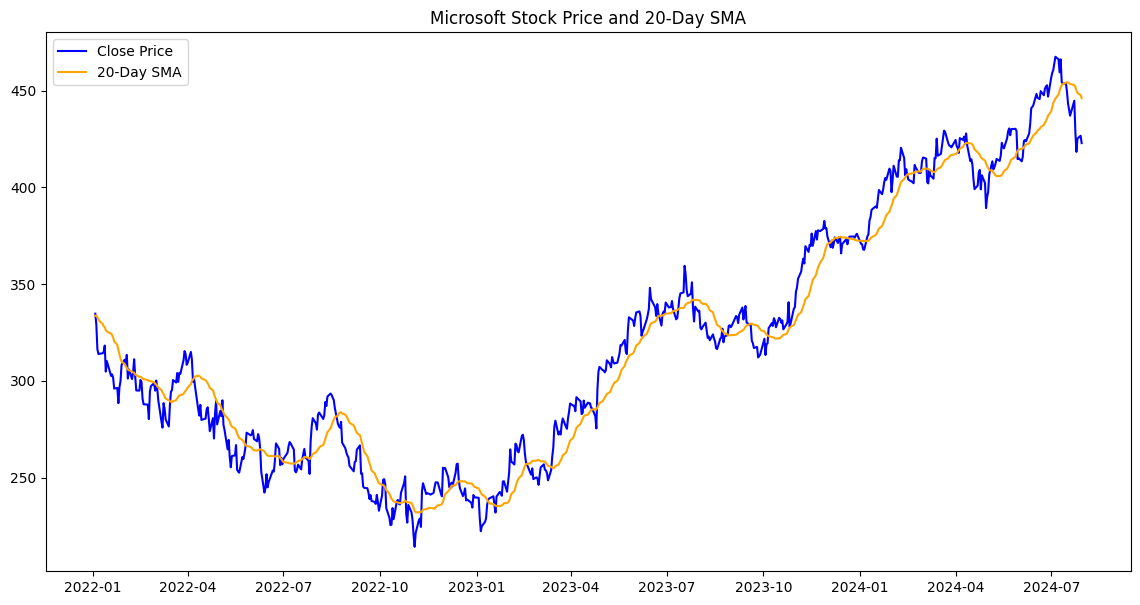

In [125]:
# Plot Close Price and SMA
plt.figure(figsize=(14, 7))
plt.plot(recentM['Date'], recentM['Close'], label='Close Price', color='blue')
plt.plot(recentM['Date'], recentM['SMA_20'], label='20-Day SMA', color='orange')
plt.title('Microsoft Stock Price and 20-Day SMA')
plt.legend()


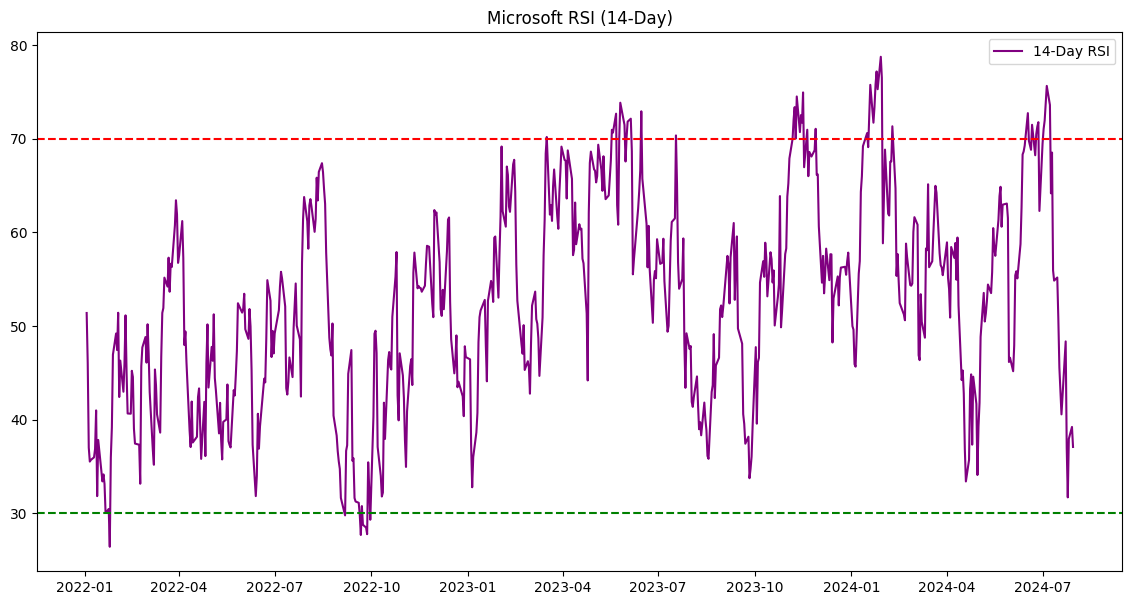

In [126]:
# Plot RSI

plt.figure(figsize=(14, 7))
plt.plot(recentM['Date'], recentM['RSI_14'], label='14-Day RSI', color='purple')
plt.title('Microsoft RSI (14-Day)')
plt.axhline(70, color='red', linestyle='--')  # Overbought line
plt.axhline(30, color='green', linestyle='--')  # Oversold line
plt.legend()

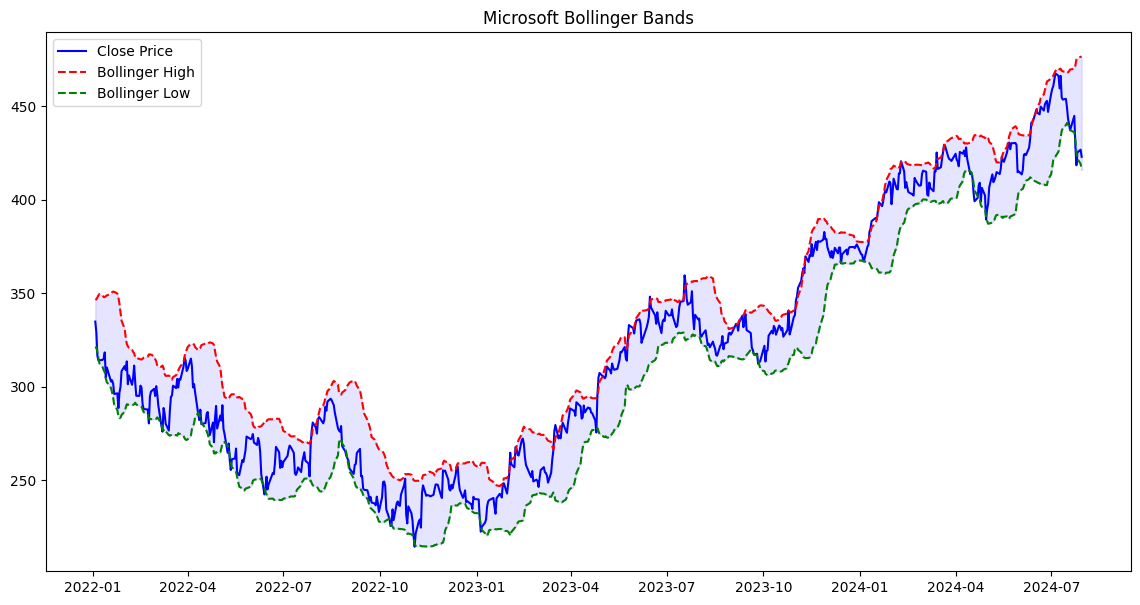

In [127]:
plt.figure(figsize=(14, 7))

plt.plot(recentM['Date'], recentM['Close'], label='Close Price', color='blue')
plt.plot(recentM['Date'], recentM['BB_High'], label='Bollinger High', linestyle='--', color='red')
plt.plot(recentM['Date'], recentM['BB_Low'], label='Bollinger Low', linestyle='--', color='green')
plt.fill_between(recentM['Date'], recentM['BB_Low'], recentM['BB_High'], color='blue', alpha=0.1)
plt.title('Microsoft Bollinger Bands')
plt.legend()


## Technical Analysis of Amazon

In [128]:
Amzn= pd.read_csv('AMZN_historical_data.csv')

In [129]:
Amzn['Date'] = pd.to_datetime(Msft['Date'])

In [130]:
Amzn.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1986-03-14,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1986-03-17,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1986-03-18,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1986-03-19,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0


In [131]:
# Simple Moving Average (SMA) with a 20-day window
Amzn['SMA_20'] = ta.trend.sma_indicator(Amzn['Close'], window=20)

# Exponential Moving Average (EMA) with a 20-day window
Amzn['EMA_20'] = ta.trend.ema_indicator(Amzn['Close'], window=20)

# Relative Strength Index (RSI) with a 14-day window
Amzn['RSI_14'] = ta.momentum.rsi(Amzn['Close'], window=14)

# Bollinger Bands with a 20-day window
bbands = ta.volatility.BollingerBands(close=Msft['Close'], window=20, window_dev=2)
Amzn['BB_High'] = bbands.bollinger_hband()
Amzn['BB_Low'] = bbands.bollinger_lband()

# Moving Average Convergence Divergence (MACD)
Amzn['MACD'] = ta.trend.macd(Amzn['Close'])
Amzn['MACD_Signal'] = ta.trend.macd_signal(Amzn['Close'])


# Calculate daily returns using the ta library
Amzn['Daily Return'] = Amzn['Close'].pct_change()

In [160]:
recentD= Amzn[Amzn['Date'] >= '2010-01-01']

In [161]:
recentD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 841 entries, 6005 to 6845
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          841 non-null    datetime64[ns]
 1   Open          841 non-null    float64       
 2   High          841 non-null    float64       
 3   Low           841 non-null    float64       
 4   Close         841 non-null    float64       
 5   Adj Close     841 non-null    float64       
 6   Volume        841 non-null    int64         
 7   Dividends     841 non-null    float64       
 8   Stock Splits  841 non-null    float64       
 9   SMA_20        841 non-null    float64       
 10  EMA_20        841 non-null    float64       
 11  RSI_14        841 non-null    float64       
 12  BB_High       841 non-null    float64       
 13  BB_Low        841 non-null    float64       
 14  MACD          841 non-null    float64       
 15  MACD_Signal   841 non-null    float64    

In [162]:
recentD.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,EMA_20,RSI_14,BB_High,BB_Low,MACD,MACD_Signal,Daily Return
6005,2010-01-04,152.203003,152.832993,149.800003,152.601501,152.601501,66258000,0.0,0.0,153.362926,154.690846,44.728522,31.475572,29.241428,-1.284419,-1.554241,0.001894
6006,2010-01-05,152.772003,154.562500,151.422501,153.786499,153.786499,54920000,0.0,0.0,153.186901,154.604718,47.099943,31.539734,29.275266,-1.206924,-1.484777,0.007765
6007,2010-01-06,153.500504,153.649994,151.699997,152.764496,152.764496,46752000,0.0,0.0,153.088801,154.429459,45.294945,31.562109,29.350891,-1.213982,-1.430618,-0.006646
6008,2010-01-07,153.203003,155.966507,153.125000,154.703995,154.703995,61878000,0.0,0.0,153.311501,154.455605,49.268303,31.528828,29.472172,-1.050960,-1.354686,0.012696
6009,2010-01-08,155.897003,158.121994,155.777496,158.050003,158.050003,58806000,0.0,0.0,153.770076,154.797929,55.300250,31.511609,29.584391,-0.644340,-1.212617,0.021628


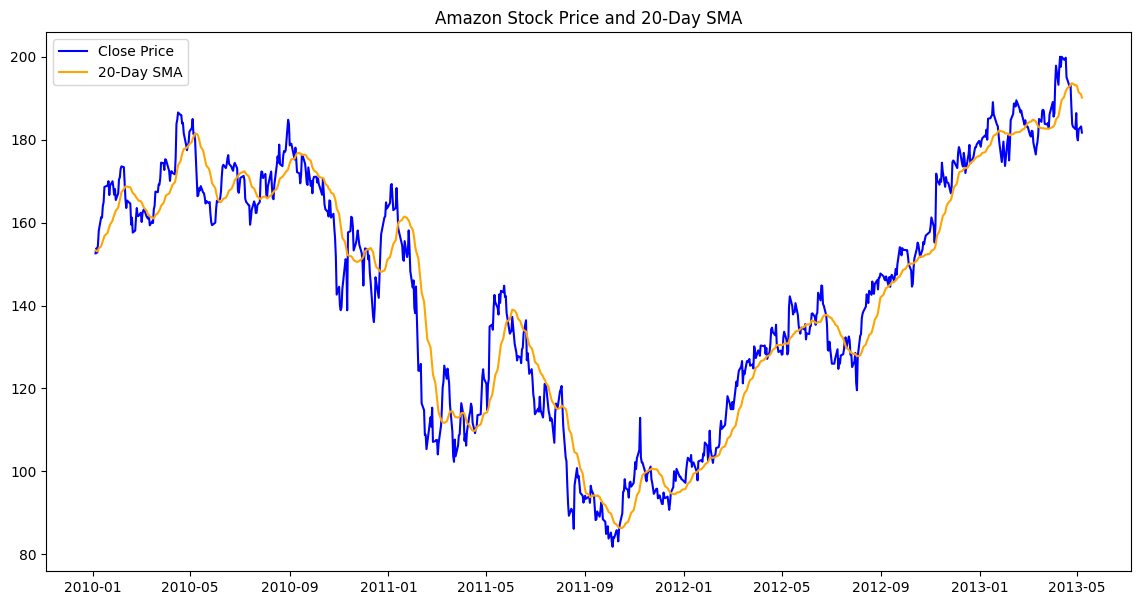

In [163]:
# Plot Close Price and SMA
plt.figure(figsize=(14, 7))

plt.plot(recentD['Date'], recentD['Close'], label='Close Price', color='blue')
plt.plot(recentD['Date'], recentD['SMA_20'], label='20-Day SMA', color='orange')
plt.title('Amazon Stock Price and 20-Day SMA')
plt.legend()

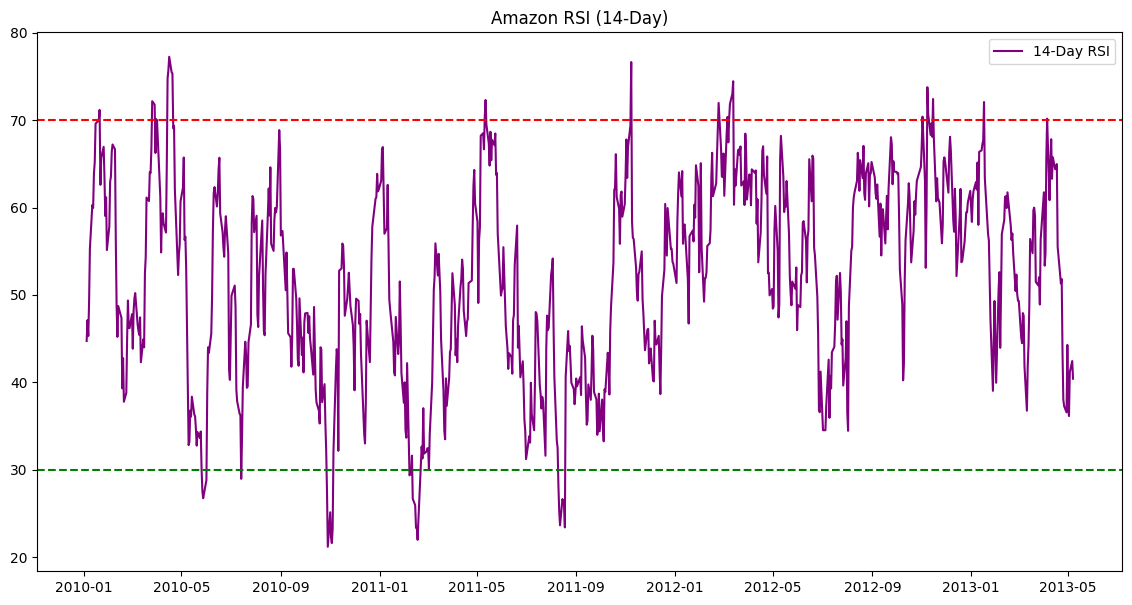

In [166]:
# Plot RSI

plt.figure(figsize=(14, 7))
plt.plot(recentD['Date'], recentD['RSI_14'], label='14-Day RSI', color='purple')
plt.title('Amazon RSI (14-Day)')
plt.axhline(70, color='red', linestyle='--')  # Overbought line
plt.axhline(30, color='green', linestyle='--')  # Oversold line
plt.legend()

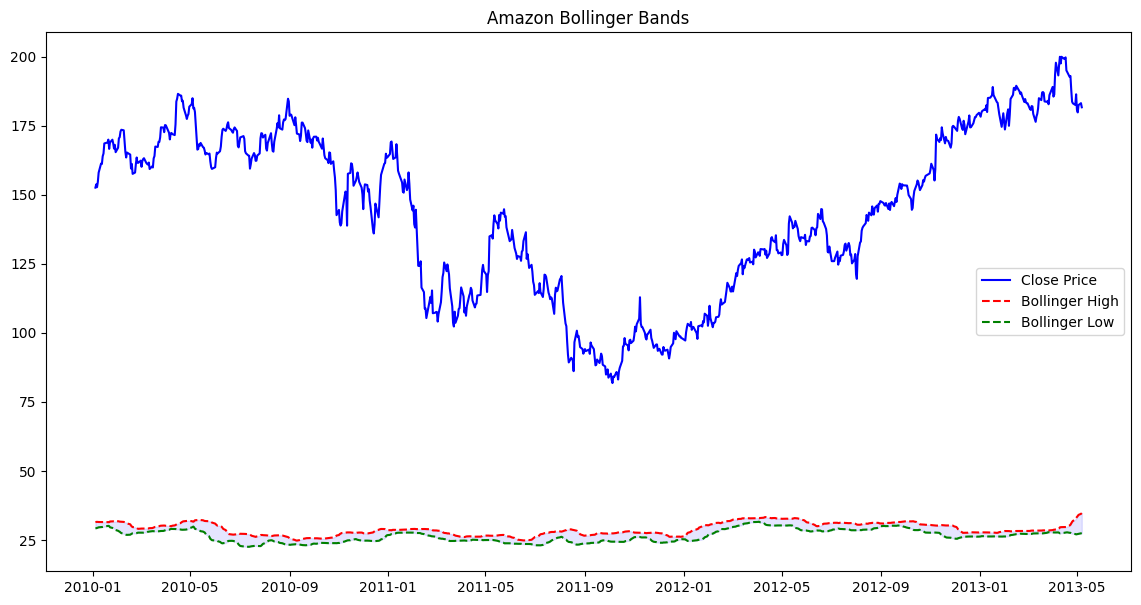

In [167]:
plt.figure(figsize=(14, 7))

plt.plot(recentD['Date'], recentD['Close'], label='Close Price', color='blue')
plt.plot(recentD['Date'], recentD['BB_High'], label='Bollinger High', linestyle='--', color='red')
plt.plot(recentD['Date'], recentD['BB_Low'], label='Bollinger Low', linestyle='--', color='green')
plt.fill_between(recentD['Date'], recentD['BB_Low'], recentD['BB_High'], color='blue', alpha=0.1)
plt.title('Amazon Bollinger Bands')
plt.legend()


## Technical Analysis of Google

In [169]:
Goog = pd.read_csv('GOOG_historical_data.csv')


In [170]:
Goog['Date'] = pd.to_datetime(Goog['Date'])


In [171]:
# Simple Moving Average (SMA) with a 20-day window
Goog['SMA_20'] = ta.trend.sma_indicator(Amzn['Close'], window=20)

# Exponential Moving Average (EMA) with a 20-day window
Goog['EMA_20'] = ta.trend.ema_indicator(Goog['Close'], window=20)

# Relative Strength Index (RSI) with a 14-day window
Goog['RSI_14'] = ta.momentum.rsi(Goog['Close'], window=14)

# Bollinger Bands with a 20-day window
bbands = ta.volatility.BollingerBands(close=Msft['Close'], window=20, window_dev=2)
Goog['BB_High'] = bbands.bollinger_hband()
Goog['BB_Low'] = bbands.bollinger_lband()

# Moving Average Convergence Divergence (MACD)
Goog['MACD'] = ta.trend.macd(Goog['Close'])
Goog['MACD_Signal'] = ta.trend.macd_signal(Amzn['Close'])


# Calculate daily returns using the ta library
Goog['Daily Return'] = Goog['Close'].pct_change()

In [175]:
# Simple Moving Average (SMA) with a 20-day window
Goog['SMA_20'] = ta.trend.sma_indicator(Goog
['Close'], window=20)

# Exponential Moving Average (EMA) with a 20-day window
Goog['EMA_20'] = ta.trend.ema_indicator(Goog['Close'], window=20)

# Relative Strength Index (RSI) with a 14-day window
Goog['RSI_14'] = ta.momentum.rsi(Goog['Close'], window=14)

# Bollinger Bands with a 20-day window
bbands = ta.volatility.BollingerBands(close=Msft['Close'], window=20, window_dev=2)
Goog['BB_High'] = bbands.bollinger_hband()
Goog['BB_Low'] = bbands.bollinger_lband()

# Moving Average Convergence Divergence (MACD)
Goog['MACD'] = ta.trend.macd(Goog['Close'])
Goog['MACD_Signal'] = ta.trend.macd_signal(Goog['Close'])


# Calculate daily returns using the ta library
Goog['Daily Return'] = Goog['Close'].pct_change()

In [176]:
recentG= Goog[Goog['Date'] >= '2022-01-01']

In [177]:
recentG.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,EMA_20,RSI_14,BB_High,BB_Low,MACD,MACD_Signal,Daily Return
4374,2022-01-03,144.475494,145.550003,143.502502,145.074493,144.909592,25214000,0.0,0.0,146.075301,145.806217,48.010599,27.879055,24.852945,-0.013619,0.069532,0.002730
4375,2022-01-04,145.550507,146.610001,143.816147,144.416504,144.252350,22928000,0.0,0.0,146.106301,145.673863,46.253599,27.952287,24.967713,-0.119911,0.031644,-0.004536
4376,2022-01-05,144.181000,144.298004,137.523499,137.653503,137.497040,49642000,0.0,0.0,145.587151,144.910019,32.918854,28.079851,24.996149,-0.741320,-0.122949,-0.046830
4377,2022-01-06,137.497498,139.686005,136.763504,137.550995,137.394653,29050000,0.0,0.0,145.028676,144.209160,32.764666,28.096834,25.041166,-1.227909,-0.343941,-0.000745
4378,2022-01-07,137.904999,138.254745,135.789001,137.004501,136.848770,19408000,0.0,0.0,144.473601,143.523002,31.906649,28.126034,25.093966,-1.638740,-0.602901,-0.003973


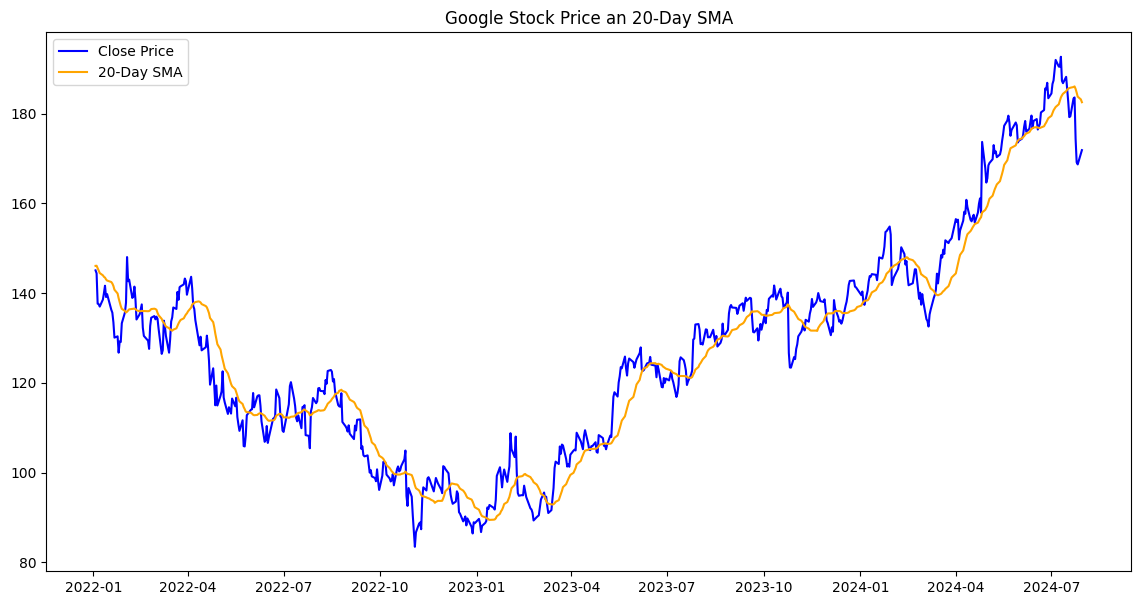

In [178]:
plt.figure(figsize=(14, 7))

# Plot Close Price and SMA
#plt.subplot(3, 1, 1)
plt.plot(recentG['Date'], recentG['Close'], label='Close Price', color='blue')
plt.plot(recentG['Date'], recentG['SMA_20'], label='20-Day SMA', color='orange')
plt.title('Google Stock Price an 20-Day SMA')
plt.legend()


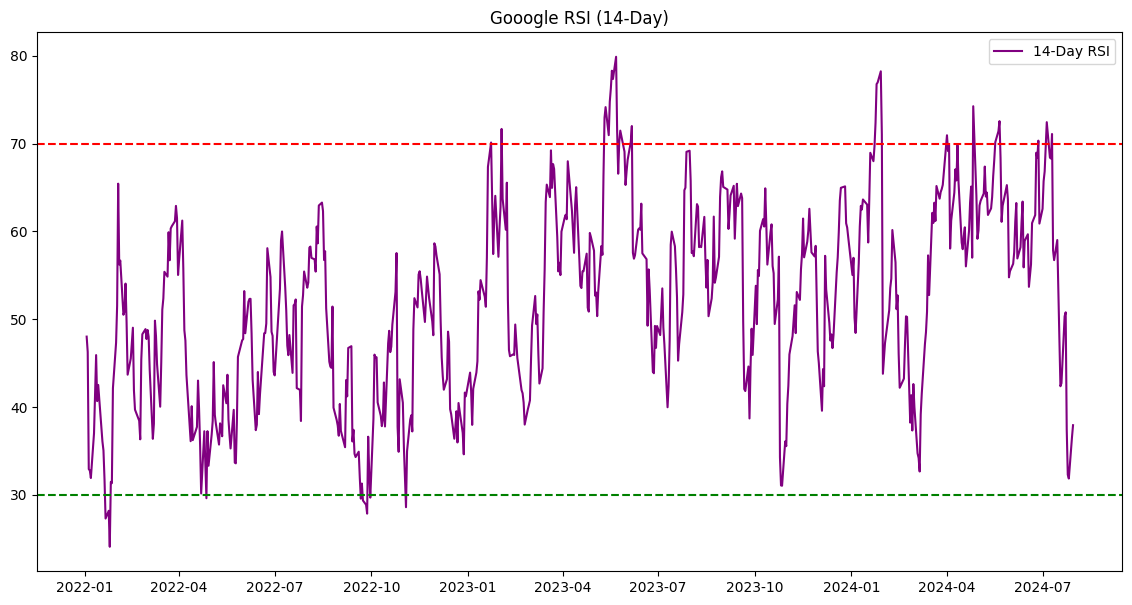

In [179]:
plt.figure(figsize=(14, 7))

# Plot RSI
#plt.subplot(3, 1, 2)
plt.plot(recentG['Date'], recentG['RSI_14'], label='14-Day RSI', color='purple')
plt.title('Gooogle RSI (14-Day)')
plt.axhline(70, color='red', linestyle='--')  # Overbought line
plt.axhline(30, color='green', linestyle='--')  # Oversold line
plt.legend()

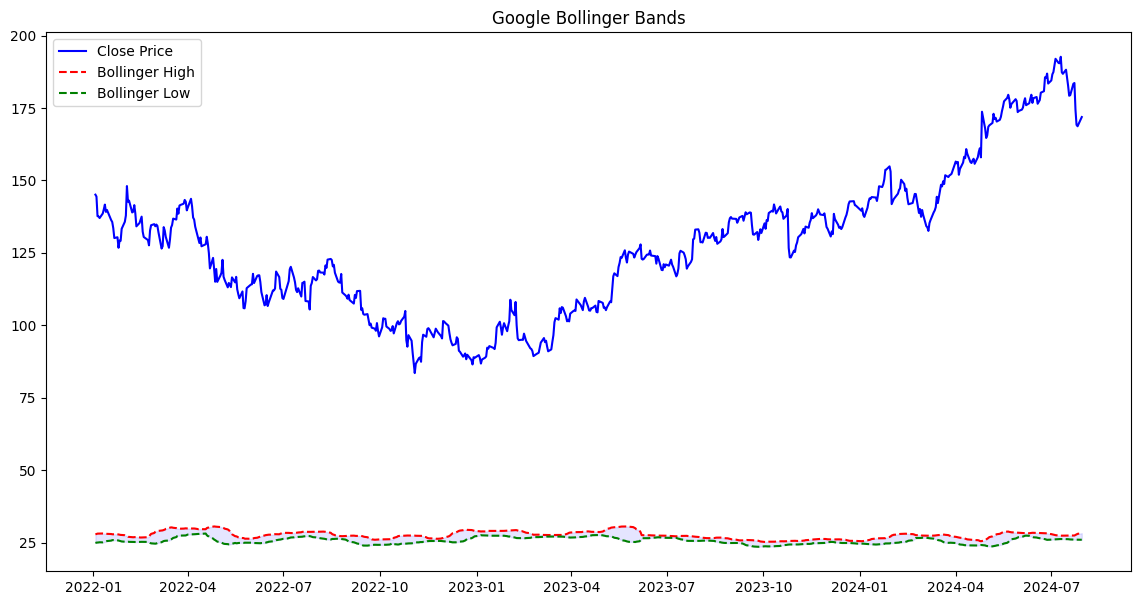

In [180]:
plt.figure(figsize=(14, 7))
plt.plot(recentG['Date'], recentG['Close'], label='Close Price', color='blue')
plt.plot(recentG['Date'], recentG['BB_High'], label='Bollinger High', linestyle='--', color='red')
plt.plot(recentG['Date'], recentG['BB_Low'], label='Bollinger Low', linestyle='--', color='green')
plt.fill_between(recentG['Date'], recentG['BB_Low'], recentG['BB_High'], color='blue', alpha=0.1)
plt.title('Google Bollinger Bands')
plt.legend()

## Technical analysis of Meta

In [181]:
Meta= pd.read_csv('META_historical_data.csv')

In [182]:
Meta['Date'] = pd.to_datetime(Meta['Date'])

In [201]:
Meta['SMA_20'] = ta.trend.sma_indicator(Meta['Close'], window=20)
Meta['EMA_20'] = ta.trend.ema_indicator(Meta['Close'], window=20)
Meta['RSI_14'] = ta.momentum.rsi(Meta['Close'], window=14)

# Bollinger Bands with a 20-day window
bbands = ta.volatility.BollingerBands(close=Meta['Close'], window=20, window_dev=2)
Meta['BB_High'] = bbands.bollinger_hband()
Meta['BB_Low'] = bbands.bollinger_lband()

 #Moving Average Convergence Divergence (MACD)
Meta['MACD'] = ta.trend.macd(Meta['Close'])
Meta['MACD_Signal'] = ta.trend.macd_signal(Meta['Close'])

# Calculate daily returns using the ta library
Meta['Daily Return'] = Meta['Close'].pct_change()


In [202]:
recentMe= Meta[Meta['Date'] >= '2022-01-01']

In [203]:
recentMe.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,EMA_20,RSI_14,BB_High,BB_Low,MACD,MACD_Signal,Daily Return
2280,2022-01-03,338.299988,341.079987,337.190002,338.540009,337.845764,14537900,0.0,0.0,334.466000,336.062486,52.591178,349.207819,319.724182,2.602666,1.799108,0.006511
2281,2022-01-04,339.950012,343.089996,331.869995,336.529999,335.839874,15998000,0.0,0.0,335.399001,336.107011,50.980227,348.032519,322.765482,2.298603,1.899007,-0.005937
2282,2022-01-05,333.019989,335.760010,323.839996,324.170013,323.505249,20564500,0.0,0.0,335.467001,334.970154,42.382880,347.840713,323.093290,1.048200,1.728845,-0.036728
2283,2022-01-06,322.820007,339.170013,322.720001,332.459991,331.778198,27962800,0.0,0.0,335.562001,334.731091,48.639144,347.812116,323.311886,0.717903,1.526657,0.025573
2284,2022-01-07,332.739990,337.000000,328.880005,331.790009,331.109589,14722000,0.0,0.0,335.660501,334.450988,48.183779,347.755045,323.565957,0.397496,1.300825,-0.002015


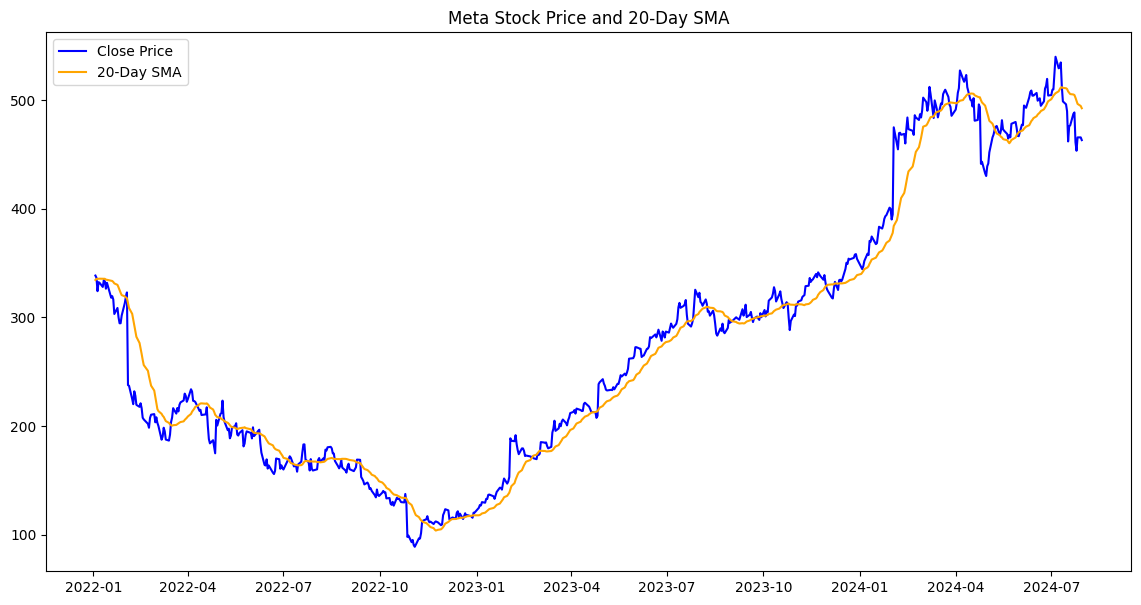

In [204]:
# Plot Close Price and SMA
plt.figure(figsize=(14, 7))

plt.plot(recentMe['Date'], recentMe['Close'], label='Close Price', color='blue')
plt.plot(recentMe['Date'], recentMe['SMA_20'], label='20-Day SMA', color='orange')
plt.title('Meta Stock Price and 20-Day SMA')
plt.legend()

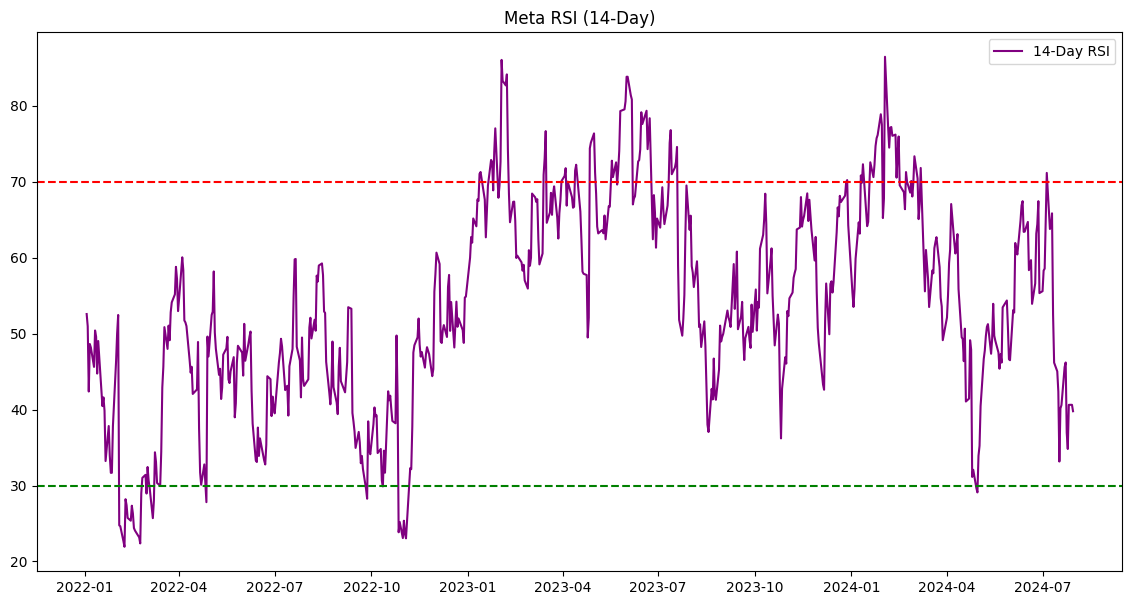

In [205]:
# Plot RSI

plt.figure(figsize=(14, 7))
plt.plot(recentMe['Date'], recentMe['RSI_14'], label='14-Day RSI', color='purple')
plt.title('Meta RSI (14-Day)')
plt.axhline(70, color='red', linestyle='--')  # Overbought line
plt.axhline(30, color='green', linestyle='--')  # Oversold line
plt.legend()

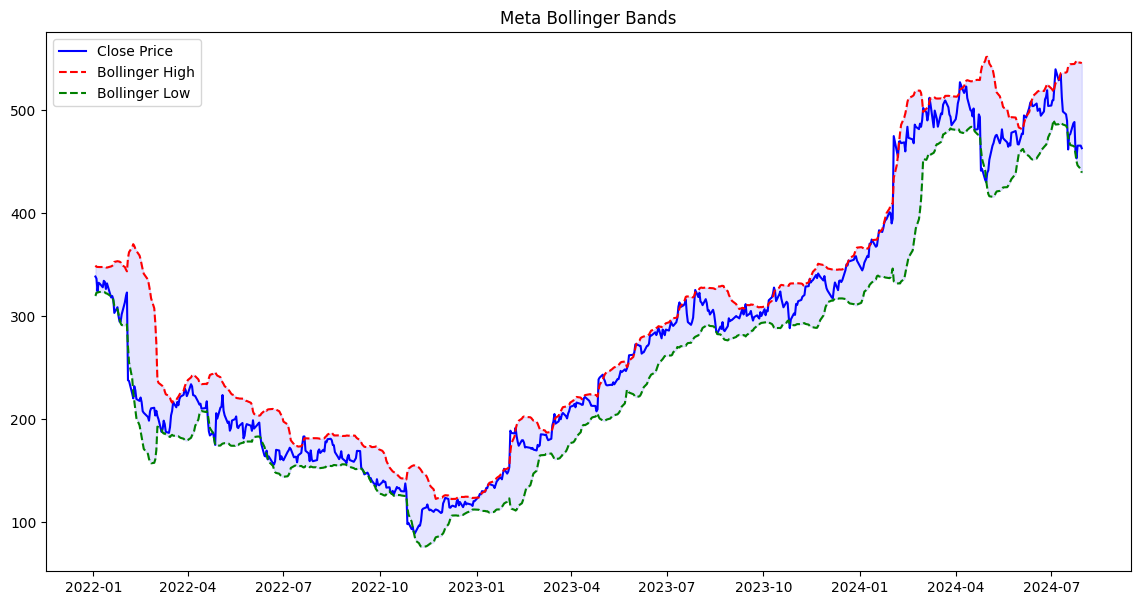

In [206]:
plt.figure(figsize=(14, 7))
plt.plot(recentMe['Date'], recentMe['Close'], label='Close Price', color='blue')
plt.plot(recentMe['Date'], recentMe['BB_High'], label='Bollinger High', linestyle='--', color='red')
plt.plot(recentMe['Date'], recentMe['BB_Low'], label='Bollinger Low', linestyle='--', color='green')
plt.fill_between(recentMe['Date'], recentMe['BB_Low'], recentMe['BB_High'], color='blue', alpha=0.1)
plt.title('Meta Bollinger Bands')
plt.legend()

## Nivda Technical analysis

In [190]:
nvda= pd.read_csv('NVDA_historical_data.csv')

In [191]:
nvda['Date'] = pd.to_datetime(nvda['Date'])


In [192]:
nvda['SMA_20'] = ta.trend.sma_indicator(nvda['Close'], window=20)
nvda['EMA_20'] = ta.trend.ema_indicator(nvda['Close'], window=20)
nvda['RSI_14'] = ta.momentum.rsi(nvda['Close'], window=14)

# Bollinger Bands with a 20-day window
bbands = ta.volatility.BollingerBands(close=nvda['Close'], window=20, window_dev=2)
nvda['BB_High'] = bbands.bollinger_hband()
nvda['BB_Low'] = bbands.bollinger_lband()

 #Moving Average Convergence Divergence (MACD)
nvda['MACD'] = ta.trend.macd(nvda['Close'])
nvda['MACD_Signal'] = ta.trend.macd_signal(nvda['Close'])

# Calculate daily returns using the ta library
nvda['Daily Return'] = nvda['Close'].pct_change()


In [193]:
recentN= nvda[nvda['Date'] >= '2022-01-01']

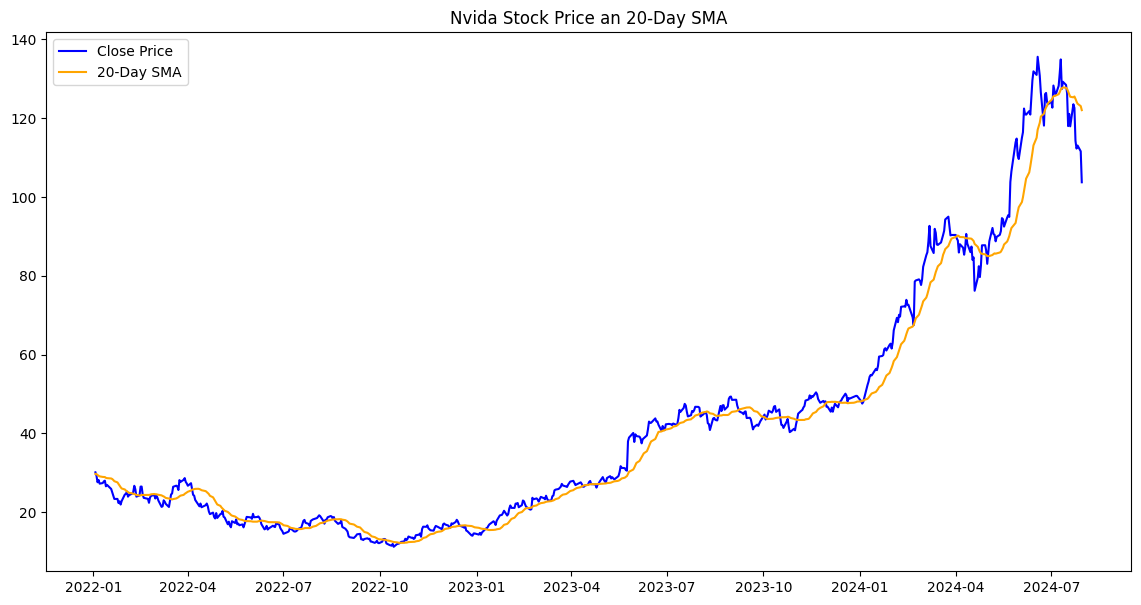

In [194]:
plt.figure(figsize=(14, 7))

plt.plot(recentN['Date'], recentN['Close'], label='Close Price', color='blue')
plt.plot(recentN['Date'], recentN['SMA_20'], label='20-Day SMA', color='orange')
plt.title('Nvida Stock Price an 20-Day SMA')
plt.legend()


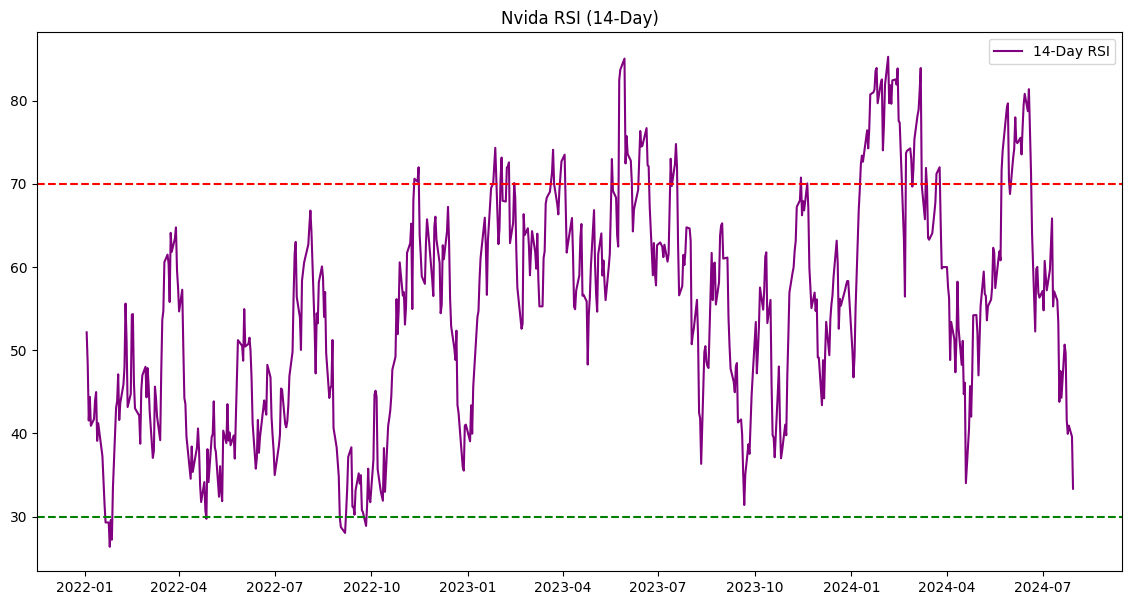

In [195]:
# Plot RSI

plt.figure(figsize=(14, 7))
plt.plot(recentN['Date'], recentN['RSI_14'], label='14-Day RSI', color='purple')
plt.title('Nvida RSI (14-Day)')
plt.axhline(70, color='red', linestyle='--')  # Overbought line
plt.axhline(30, color='green', linestyle='--')  # Oversold line
plt.legend()

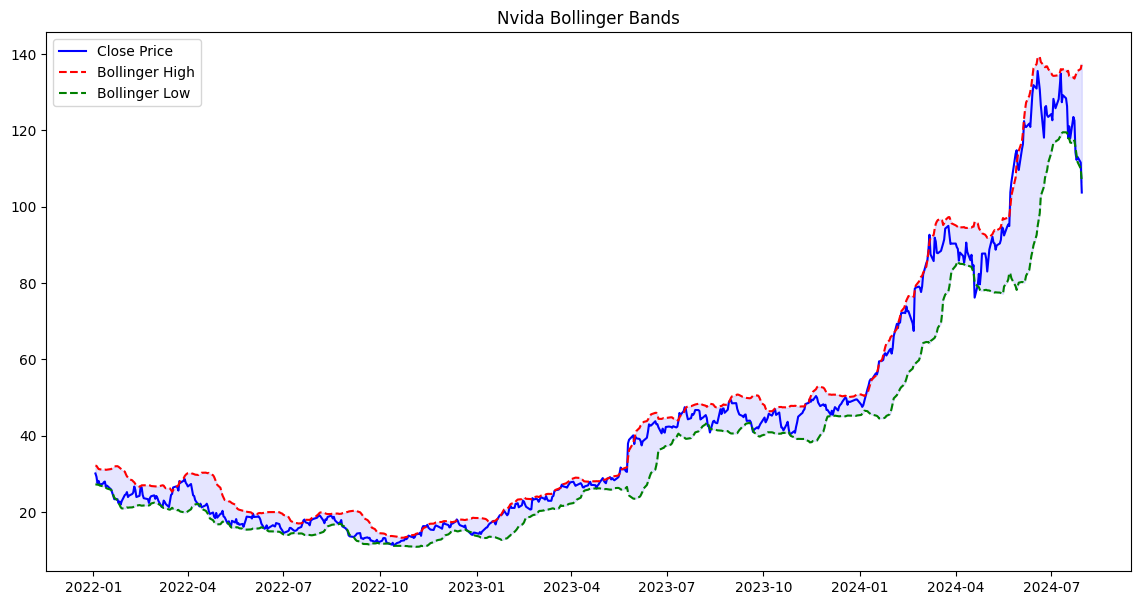

In [207]:
plt.figure(figsize=(14, 7))
plt.plot(recentN['Date'], recentN['Close'], label='Close Price', color='blue')
plt.plot(recentN['Date'], recentN['BB_High'], label='Bollinger High', linestyle='--', color='red')
plt.plot(recentN['Date'], recentN['BB_Low'], label='Bollinger Low', linestyle='--', color='green')
plt.fill_between(recentN['Date'], recentN['BB_Low'], recentN['BB_High'], color='blue', alpha=0.1)
plt.title('Nvida Bollinger Bands')
plt.legend()

## Technical analysis of tesla

In [198]:
tsla = pd.read_csv('TSLA_historical_data.csv')

In [199]:
tsla['Date'] = pd.to_datetime(tsla['Date'])

In [208]:
tsla['SMA_20'] = ta.trend.sma_indicator(tsla['Close'], window=20)
tsla['EMA_20'] = ta.trend.ema_indicator(tsla['Close'], window=20)
tsla['RSI_14'] = ta.momentum.rsi(tsla['Close'], window=14)

# Bollinger Bands with a 20-day window
bbands = ta.volatility.BollingerBands(close=tsla['Close'], window=20, window_dev=2)
tsla['BB_High'] = bbands.bollinger_hband()
tsla['BB_Low'] = bbands.bollinger_lband()

 #Moving Average Convergence Divergence (MACD)
tsla['MACD'] = ta.trend.macd(tsla['Close'])
tsla['MACD_Signal'] = ta.trend.macd_signal(tsla['Close'])

# Calculate daily returns using the ta library
tsla['Daily Return'] = tsla['Close'].pct_change()


In [209]:
recentT= tsla[tsla['Date'] >= '2022-01-01']

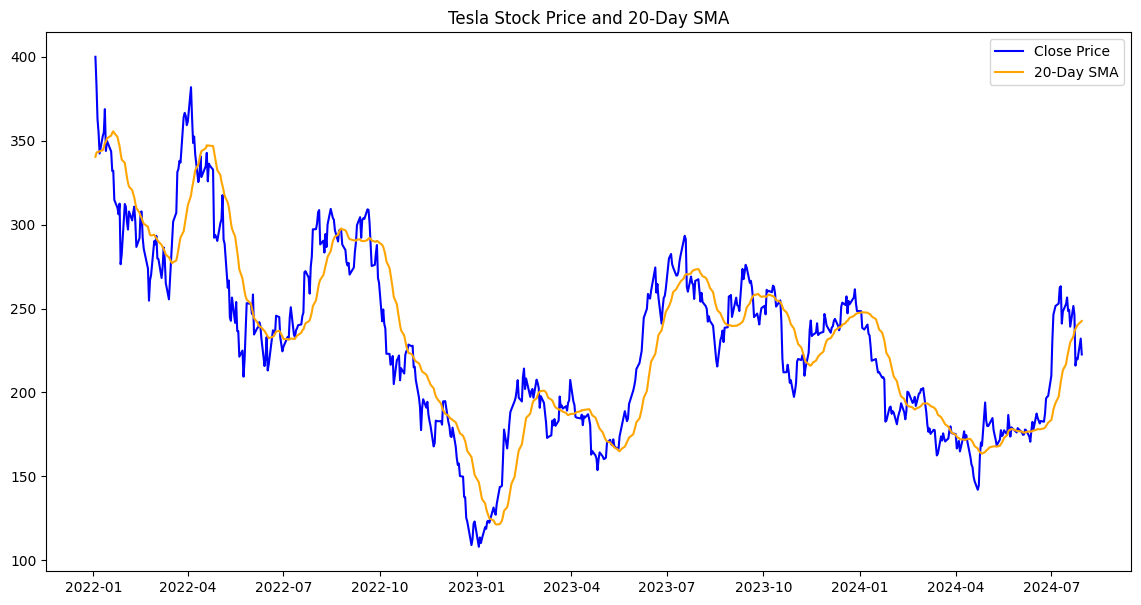

In [210]:
# Plot Close Price and SMA
plt.figure(figsize=(14, 7))

plt.plot(recentT['Date'], recentT['Close'], label='Close Price', color='blue')
plt.plot(recentT['Date'], recentT['SMA_20'], label='20-Day SMA', color='orange')
plt.title('Tesla Stock Price and 20-Day SMA')
plt.legend()

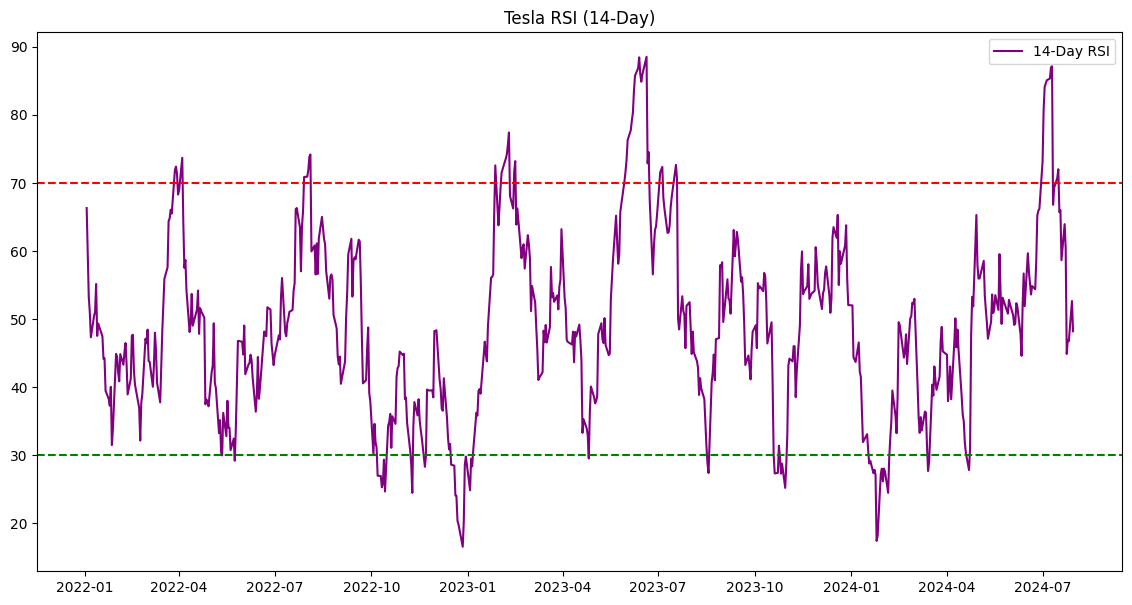

In [211]:
# Plot RSI

plt.figure(figsize=(14, 7))
plt.plot(recentT['Date'], recentT['RSI_14'], label='14-Day RSI', color='purple')
plt.title('Tesla RSI (14-Day)')
plt.axhline(70, color='red', linestyle='--')  # Overbought line
plt.axhline(30, color='green', linestyle='--')  # Oversold line
plt.legend()

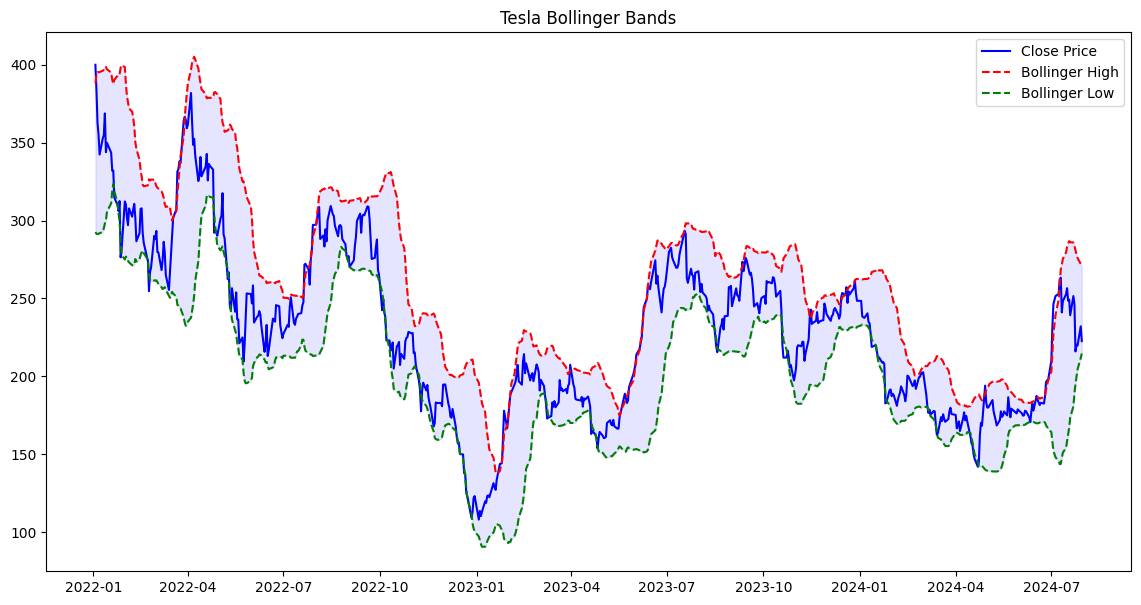

In [212]:
plt.figure(figsize=(14, 7))
plt.plot(recentT['Date'], recentT['Close'], label='Close Price', color='blue')
plt.plot(recentT['Date'], recentT['BB_High'], label='Bollinger High', linestyle='--', color='red')
plt.plot(recentT['Date'], recentT['BB_Low'], label='Bollinger Low', linestyle='--', color='green')
plt.fill_between(recentT['Date'], recentT['BB_Low'], recentT['BB_High'], color='blue', alpha=0.1)
plt.title('Tesla Bollinger Bands')
plt.legend()